In [2]:
#import packages
%matplotlib inline
from os import chdir
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set working directory
wd="/Users/geoffrey.kip/Projects/flight_delays"
chdir(wd)


In [8]:
# Read in all data
# Publicly available 2015 Airline Data
flights= pd.read_csv("./data/flights.csv")
airports= pd.read_csv("./data/airports.csv")
airlines= pd.read_csv("./data/airlines.csv")

# Rename columns
flights.describe()
flights.shape
flights1= flights[:1000]
flights.rename(columns={'AIRLINE': 'IATA_CODE', 'ORIGIN_AIRPORT':'ORIGIN_AIRPORT_CODE',
                        'DESTINATION_AIRPORT':'DESTINATION_AIRPORT_CODE'}, inplace=True)

origin_airports = airports.rename(columns={'IATA_CODE':'ORIGIN_AIRPORT_CODE','AIRPORT': 'ORIGIN_AIRPORT',
                                           'CITY':'ORIGIN_CITY'})
destination_airports = airports.rename(columns={'IATA_CODE':'DESTINATION_AIRPORT_CODE','AIRPORT': 'DESTINATION_AIRPORT',
                                                'CITY':'DESTINATION_CITY'})
# Merge datasets together
flights2 = pd.merge(flights, airlines,  how='left', on="IATA_CODE")
flights3 = pd.merge(flights2, origin_airports[['ORIGIN_AIRPORT_CODE','ORIGIN_AIRPORT',
 'ORIGIN_CITY']], how= 'left', left_on='ORIGIN_AIRPORT_CODE', right_on='ORIGIN_AIRPORT_CODE')
flights_df = pd.merge(flights3, destination_airports[['DESTINATION_AIRPORT_CODE','DESTINATION_AIRPORT',
 'DESTINATION_CITY']], how= 'left', left_on='DESTINATION_AIRPORT_CODE', right_on='DESTINATION_AIRPORT_CODE')

# Recode some variables
#TO DO CODE MONTHS DAYS, SEASONS, LATE EARLY
month = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May',
            6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
day_of_week= {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

flights_df.MONTH = flights_df.MONTH.map(month)
flights_df["MONTH"]= pd.Categorical(flights_df['MONTH'], categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], ordered=True)
flights_df.DAY_OF_WEEK= flights_df.DAY_OF_WEEK.map(day_of_week)
flights_df['DAY_OF_WEEK'] = pd.Categorical(flights_df['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

# Code departure delay and arrival delay fields
flights_df['DEPARTURE_DELAY'] = np.where(flights_df['DEPARTURE_DELAY']>0,1,0)
flights_df['ARRIVAL_DELAY'] = np.where(flights_df['ARRIVAL_DELAY']>0,1,0)

/Users/geoffrey.kip/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


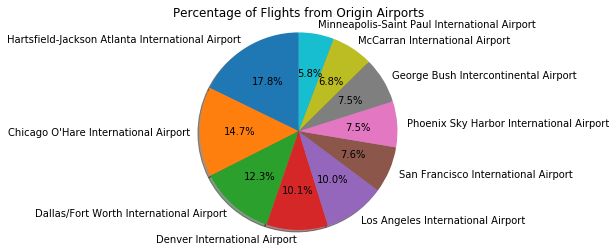

In [9]:
# GRAPHS
#1) Airports with the most origin flights
top_ten_origin_airports= flights_df['ORIGIN_AIRPORT'].value_counts()[:10]
labels = (np.array(top_ten_origin_airports.index))
fig=plt.figure()
ax=fig.add_subplot(111)
ax.pie(top_ten_origin_airports, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Percentage of Flights from Origin Airports')
plt.show()


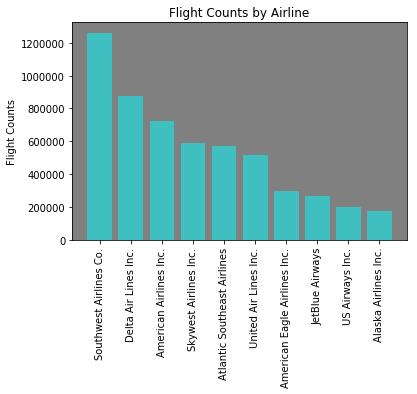

In [10]:
#2 Airlines with most flights 
top_ten_airlines= flights_df['AIRLINE'].value_counts()[:10]
labels = (np.array(top_ten_airlines.index))
y_pos=np.arange(len(labels))

fig= plt.figure()
ax= fig.add_subplot(111)
ax.bar(labels,top_ten_airlines, align='center',color='cyan',alpha=0.5)
ax.set_facecolor('gray')
plt.xticks(y_pos, labels,rotation=90)
plt.ylabel('Flight Counts')
plt.title('Flight Counts by Airline')
plt.show()

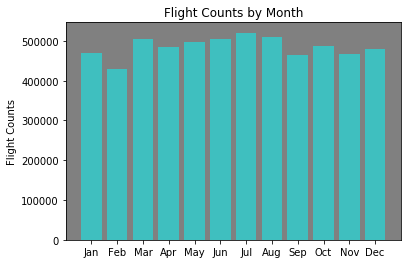

In [11]:
#3 Flights by month
month_count= flights_df["MONTH"].value_counts()
month_count = month_count.sort_index()
month = np.array(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
y_pos=np.arange(len(month))

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(month,month_count,align='center',alpha=0.5,color='cyan')
ax.set_facecolor('gray')
plt.xticks(y_pos,month)
plt.ylabel('Flight Counts')
plt.title('Flight Counts by Month')
plt.show()

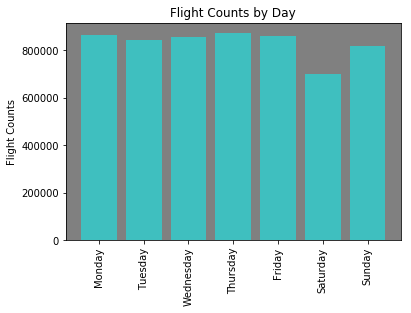

In [12]:
#4 Flights by day
day_count= flights_df["DAY_OF_WEEK"].value_counts()
day_count = day_count.sort_index()
day= np.array(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
y_pos=np.arange(len(day))

fig=plt.figure()
ax=fig.add_subplot(111)
ax.bar(day,day_count,align='center',alpha=0.5,color='cyan')
ax.set_facecolor('gray')
plt.xticks(y_pos, day,rotation=90)
plt.ylabel('Flight Counts')
plt.title('Flight Counts by Day')
plt.show()

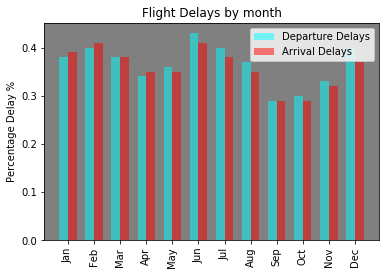

In [13]:
# 5 Plot percentage delay by month
# Which months had the highest percentage of departure and arrival delays?
dep_delay_counts = flights_df.groupby('MONTH').DEPARTURE_DELAY.mean().round(2)
arr_delay_counts = flights_df.groupby('MONTH').ARRIVAL_DELAY.mean().round(2)

y_pos=np.arange(len(month))

fig=plt.figure()
ax=fig.add_subplot(111)

# Calculate optimal width
width = np.min(np.diff(y_pos))/3.

rect1= ax.bar(y_pos-width/2,dep_delay_counts,align='center',alpha=0.5,color='cyan',width=width,label="Departure Delays")
rect2= ax.bar(y_pos+width/2,arr_delay_counts,align='center',alpha=0.5,color='red',width=width,label="Arrival Delays")
ax.set_facecolor('gray')
ax.legend( (rect1[0], rect2[0]), ('Departure Delays', 'Arrival Delays') )
plt.xticks(y_pos,month,rotation=90)
plt.ylabel('Percentage Delay %')
plt.title('Flight Delays by month')
plt.show()